# Taller de gráficos en Python (2024)

### Creado por la consejería académica de  astronomía 2024
### Créditos:
#### - Elaboración notebook: Diego Beltrán
#### - Partes del material se basan en el material de talleres anteriores, como el notebook de la consejería académica 2021 y 2023.

#### Objetivos y aprendizajes esperados 🤠
En este taller se busca que aprendan a crear gráficos utilizando la librería *matplotlib* de Python, junto a otras librerías tales como *numpy*, *astropy* o *scipy*, de modo que se puedan enfrentar a aquellos ramos de la carrera que involucren la creación y análisis de gráficos (también útil para los laboratorios científicos). Está pensado principalmente para estudiantes de segundo y tercer semestre que ya hayan aprobado el ramo "Introducción a la Programación", en especial a aquellos que esten cursando el curso "Introducción al Análisis de Datos".

#### Contenidos
1. [Listas, *arrays*, y tablas](#1)
2. [Escribir y leer archivos csv](#2)
3. [Crear gráficos](#3)
    1. [Plots](#3.1)
    2. [Subplots](#3.2)
4. [Partes de un gráfico y cómo editarlas](#4)
5. [Gráficos más utilizados](#5)
    1. [Gráficos de línea](#5.1)
    2. [Gráficos de dispersión](#5.2)
    3. [Histogramas](#5.3)
    4. [Gráficos de contorno](#5.4)
    5. [Gráficos de barra](#5.5)
6. [Herramientas para estudiar gráficos](#6)
7. [Estética de un gráfico](#7)
8. [Descripción y análisis de los gráficos](#8)

El taller les enseñará de forma básica estos conceptos, por lo que si requieren aprender algo que no esté en el notebook les sugerimos leer las documentaciones de las librerías, buscar en Stackoverflow o preguntar a sus ayudantes. 

<a id='hola'></a>
Siempre que se comienza a trabajar es necesario importar las librerías que se utilizarán. Importaremos *numpy* y le llamaremos *np* para simplificar el código. De *matplotlib* importaremos el módulo *pyplot* como *plt*, y de *astropy* importaremos *Table* del módulo *table*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

## 1. Listas, *arrays*, y tablas <a name="1"></a>

Ya conocemos las listas de python del curso de *Intro a la progra*, sin embargo existen otras formas de crear colecciones de datos. *Numpy* tiene los "*arrays*", son similares a las listas pero más versátiles, por ejemplo, permiten hacer operaciones matemáticas y estadísticas entre sí, son compatibles con otras librerías como las que utilizaremos, y son más eficientes 👨🏻‍💻. Para crear un array utilizamos la función $np.array()$.

In [2]:
# Creamos dos listas de python
lista_python_1 = [1,2,3,4,5]
lista_python_2 = [1,1,1,1,1]

# Creamos dos arrays de numpy
array_np_1 = np.array([1,2,3,4,5])
array_np_2 = np.array([1,1,1,1,1])

¿Y si queremos sumar los elementos de una lista con otra? A continuación vemos que si sumamos dos listas de python, estas se concatenan, sin embargo al sumar dos *arrays* vemos que estos efectivamente suman sus elementos. 

In [3]:
lista_python_1 + lista_python_2

[1, 2, 3, 4, 5, 1, 1, 1, 1, 1]

In [4]:
array_np_1 + array_np_2

array([2, 3, 4, 5, 6])

Incluso podemos realizar otras operaciones como  multiplicar todo el *array* por un escalar.

In [5]:
3*array_np_1

array([ 3,  6,  9, 12, 15])

Ahora veremos las tablas de *astropy*. Las tablas funcionan con filas y columnas, las cuales se comportan muy similar a los *arrays*, la ventaja es que ahora podemos coleccionar mayor cantidad de datos y de manera ordenada. A continuación creamos una tabla con las dos listas que utilizamos en los ejemplos anterirores, para esto utilizamos $Table()$.

In [6]:
tabla = Table([ [1,2,3,4,5] , [1,1,1,1,1] ]) # Se entrega una tabla con las columnas que queremos
tabla

col0,col1
int32,int32
1,1
2,1
3,1
4,1
5,1


También podemos realizar operaciones como con los *arrays* de *numpy*. Para acceder a las columnas podemos utilizar $.columns[i]$ donde $i$ es el índice de la columna en la tabla.

In [7]:
tabla.columns[0] + tabla.columns[1]

2
3
4
5
6


**Sitios de interés para esta sección** 👀:
1. [Listas de *Python*](https://www.w3schools.com/python/python_lists.asp)
2. [*Arrays* de *numpy*](https://numpy.org/doc/stable/reference/generated/numpy.array.html)
3. [Tablas de *astropy*](https://docs.astropy.org/en/stable/table/)

## 2. Escribir y leer archivos csv <a name="2"></a>

Cuando se trabaja con datos muchas veces se tienen archivos con extensión $.csv$ o $.txt$ los cuales contienen toda la información necesaria para trabajar. Otras veces nosotros necesitamos crear archivos de ese estilo para guardar nuestros datos. Por ello, es importante aprender a manejar archvios en Pyhton. 

**Primero vamos a escribir un archivo ✍️, ¡pero sin datos no hay archivo!**

Crearemos 4 listas, donde cada una se obtiene evaluando los números del 0 al 15 para una función a nuestra elección. Consideraremos las siguientes funciones:
* $x^2$
* $12x + 4$
* $sin(\frac{\pi x}{8})$
* $e^x$

In [8]:
# Creamos el Eje X con números del 0 al 15
eje_x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Escribimos los valores correspondientes a la función Y = x^2
funcion_1 = [0,1,4,9,16,25,36,49,64,81,100,121,144,169,196,225]

# Escribimos los valores correspondientes a la función Y = 12x + 4
funcion_2 = [12*x + 4 for x in eje_x] # Escribimos la lista por comprensión, una forma más eficiente

# Escribimos los valores correspondientes a la función y = sin(πx/8) + 1
funcion_3 = [np.sin(np.pi*x/8) + 1 for x in eje_x]

# Escribimos los valores correspondientes a la función y = e^x
funcion_4 = [np.exp(x) for x in eje_x]

[¿Escribir listas "por comprensión"? pincha aquí 😃](https://www.analyticslane.com/2019/09/23/listas-por-comprension-en-python/)

In [9]:
# Creamos la tabla con las listas, podemos asignar nombre a las columans utilizando "names"
tabla_funciones = Table([eje_x,funcion_1,funcion_2,funcion_3,funcion_4], names=['x','y1','y2','y3','y4'])
tabla_funciones

x,y1,y2,y3,y4
int32,int32,int32,float64,float64
0,0,4,1.0,1.0
1,1,16,1.3826834323650898,2.718281828459045
2,4,28,1.7071067811865475,7.38905609893065
3,9,40,1.9238795325112867,20.085536923187668
4,16,52,2.0,54.598150033144236
5,25,64,1.9238795325112867,148.4131591025766
6,36,76,1.7071067811865475,403.4287934927351
7,49,88,1.3826834323650898,1096.6331584284585
8,64,100,1.0000000000000002,2980.9579870417283


Ya con nuestra tabla creada, podemos utilizar la función $.write()$ para escribir un archivo con los datos de la tabla. Esta función recibe la ruta del archivo, si nuestro archivo está en el mismo directorio o carpeta simplemente debemos escrirbir el nombre del archivo y su extensión, de lo contrario podemos señalar las rutas como "*directorio_1\directorio_2\ ...\nombre_archivo.extension*".

**Nota:** En *Windows* las rutas separan los directorios con un *backslash* " \ ", si no sabes qué separador tiene el sistema operativo en el que trabajas puedes utilizar $os.path.join()$ de la libreria $os$. Aquí un [enlace](https://www.geeksforgeeks.org/python-os-path-join-method/) por si quieres saber cómo utilizarlo.

In [10]:
# Escribimos nuestro archivo "funciones.csv"
tabla_funciones.write('funciones.csv', overwrite=True) # overwrite indica que si el archivo ya existe se sobrescribirá

In [11]:
# También podemos escribir nuestro archivo con la extensión ".txt"
tabla_funciones.write('funciones.txt', format='ascii', delimiter=';', overwrite=True)
# Cuando se escribe un archivo ".txt" debemos indicar el formato de los caracteres que contienen nuestros datos
# Delimiter es opcional, e indica qué caractér se utilizará para separar los datos

**Ahora vamos a abrir un archivo 📖**

Ahora que escribimos nuestro archivo $.csv$, aprendamos a abrirlo. Para esto utilizamos $Table.read()$, entregando la ruta donde guardamos el archivo. La nueva tabla obtenida al leer el archivo se guardará con el nombre que nosotros le asignemos.

In [12]:
datos = Table.read('funciones.csv') # Leemos el archivo en la ruta "funciones.csv"
datos

x,y1,y2,y3,y4
int32,int32,int32,float64,float64
0,0,4,1.0,1.0
1,1,16,1.3826834323650898,2.718281828459045
2,4,28,1.7071067811865475,7.38905609893065
3,9,40,1.9238795325112867,20.085536923187668
4,16,52,2.0,54.598150033144236
5,25,64,1.9238795325112867,148.4131591025766
6,36,76,1.7071067811865475,403.4287934927351
7,49,88,1.3826834323650898,1096.6331584284585
8,64,100,1.0000000000000002,2980.9579870417283


A continuación vemos otras formas de acceder a los datos de la tabla.

In [13]:
datos['x'] # Acceder a una columna de la tabla usando el nombre de la columna

0
1
2
3
4
5
6
7
8
9
10


In [14]:
datos.columns[0] # Acceder a una columna de la tabla usando el índice de la columna

0
1
2
3
4
5
6
7
8
9
10


In [15]:
datos['y2'][3] # Acceder a un elemento de cierta columna

40

In [16]:
datos[3] # Acceder a una fila de la tabla

x,y1,y2,y3,y4
int32,int32,int32,float64,float64
3,9,40,1.9238795325112867,20.085536923187668


**Sitios de interés para esta sección**  👀:
1. [Lectura y escritura de tablas de *astropy*](https://docs.astropy.org/en/stable/table/io.html)
2. [Máscaras para tablas de *astropy*](https://docs.astropy.org/en/stable/table/masking.html)

## 3. Crear gráficos <a name="3"></a>

Utilizaremos los datos del archivo $funciones.csv$ creado anteriormente.

In [17]:
# Podemos extraer los datos de la tabla y almacenarlos en nuevas variables
eje_x = datos['x']
eje_y1 = datos['y1']
eje_y2 = datos['y2']
eje_y3 = datos['y3']
eje_y4 = datos['y4']

### 3.1 Plots <a name="3.1"></a>

El primer paso para crear un gráfico es crear la figura, es decir, lo que contendrá nuestros plots. Hay dos formas de crear una figura, a continuación se muestra una que sólo permite crear un gráfico dentro de la figura. Para esto utilizamos la función $figure()$, a la cual le indicamos el tamaño con $figsize = (ancho,alto)$. 

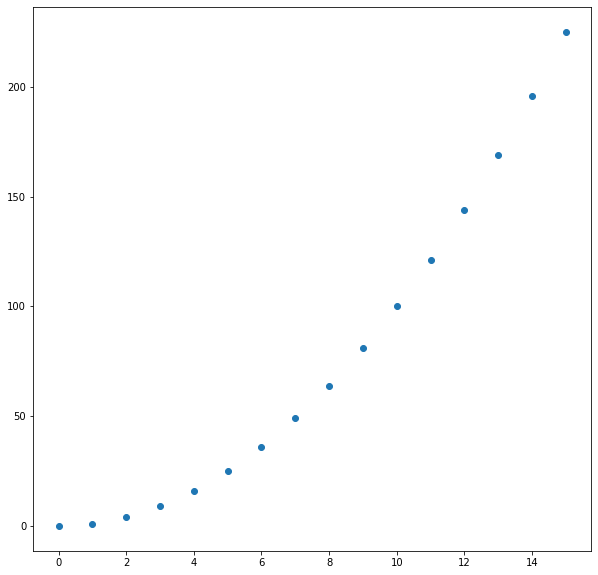

In [18]:
plt.figure(figsize = (10,10)) # Figura de tamaño 10 x 10 (inches)
plt.scatter(eje_x,eje_y1) # Gráfico de dispersión con eje_x y eje_y1
plt.show() # Muestra la figura

La otra forma de crear una figura sí nos permite tener más de un gráfico dentro, a los cuales se les llama $subplots$, la versión para 1 solo gráfico se ve así:

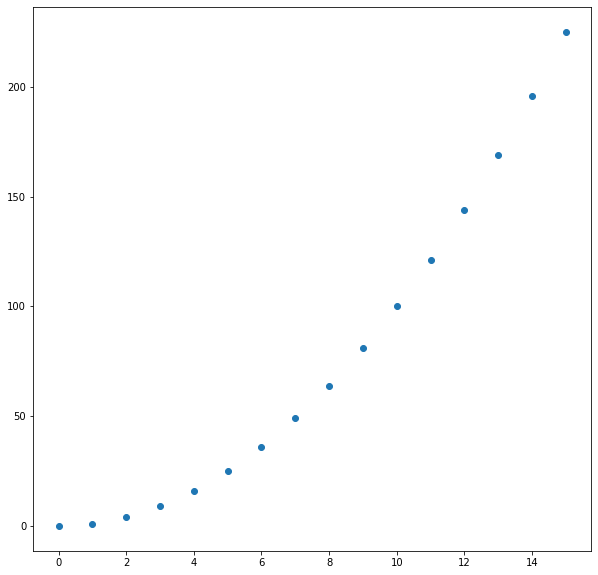

In [19]:
fig, ax = plt.subplots(figsize = (10,10)) # Crea solo 1 subplot llamado "ax"
ax.scatter(eje_x,eje_y1)
plt.show()

### 3.2 Subplots <a name="3.2"></a>

Para crear más de un $subplot$ dentro de la figura tenemos que indicarle a la función $subplots()$ la cantidad de filas y columnas que queremos. Esto se puede entender como una matriz de *n $\times$ m* tal que $subplots(n,m)$. La forma en que podemos referirnos a cada $subplot$ o "$ax$" creado es útilizando los índices en los que queremos trabajar. Por ejemplo el gráfico en la primera fila y segunda columna se escribiría $ax[0][1]$.

A continuación haremos una figura con 4 $subplots$, uno para cada función de nuestra tabla de funciones. Notar que ahora $figsize()$ no indica el tamaño de cada gráfico, si no que indica el tamaño de la figura completa.

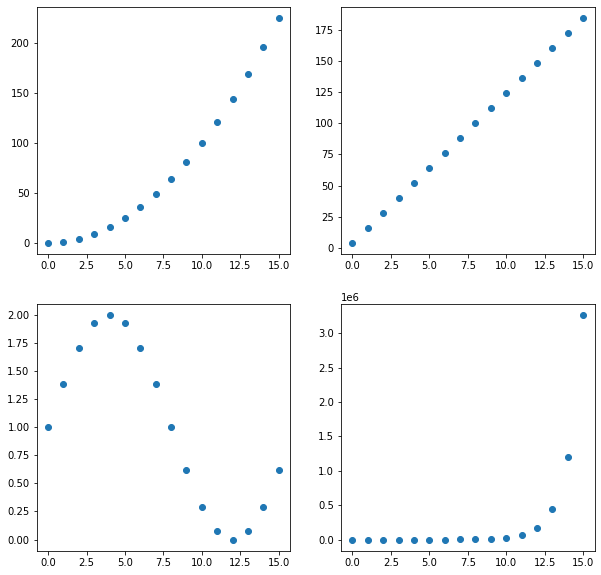

In [20]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10, 10)) # También sirve subplots(2,2,...)

ax[0][0].scatter(eje_x,eje_y1) # Graficamos la función 1
ax[0][1].scatter(eje_x,eje_y2) # Graficamos la función 2
ax[1][0].scatter(eje_x,eje_y3) # Graficamos la función 3
ax[1][1].scatter(eje_x,eje_y4) # Graficamos la función 4

plt.show() # Muestra la figura

**Sitios de interés para esta sección**  👀:
1. [Plots de *matplotlib*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
2. [Sublots de *matplotlib*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

## 4. Partes de un gráfico y cómo editarlas <a name="4"></a>

En un gráfico de 2 dimensiones tenemos el eje de variable indpendiente o *eje $X$*, y el eje dependiente de X o *eje $Y$*, al graficar en $Python$ cada uno se corresponderá con un set de datos, como hemos visto en los gráficos anteriores.

Las principales partes que podemos identificar de un gráfico son las siguientes:

### 1. Ejes
* **Título del eje**

    El título del eje corresponde a la etiqueta que se mostrará junto a los valores del eje, y para editarlo se usa la función $ax.set\_xlabel()$ o $ax.set\_ylabel()$, dependiendo del eje que queramos editar. Por el momento le entregaremos solo el texto que queremos como título (en el primer parámetro en la función) y el tamaño de la fuente ($fontsize$).
    
    Si se necesita usar símbolos o letras griegas se ingresa el nombre de la forma: $ r'\$nombre\$'$, los códigos para escribir los símbolos o letras son los utilizados en LaTeX: [Link comandos para diferentes símbolos](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols)
    
    Un buen título es directo y conciso, entregando solo la información necesaria. A veces es necesario indicar la unidad de medida de los valores del eje.

* **Límites**

    Cuando nuestro gráfico tiene zonas vacías o sin información relevante en el contexto de nuestro trabajo, podemos definir límites para que los ejes solo muestren la información de una zona específica. Esto se puede hace rcon las funciones $ax.set\_xlim()$ y $ax.set\_ylim()$.
    
* **Ticks**
    
    Los *ticks* son los valores que se marcan en los ejes. También podemos editarlos utilizando $ax.tick_params()$, donde podemos modificar cosas como la dirección en la que se ubican ($direction$, por ejemplo $in$ indica que se ubican hacia dentro del gráfico, y $out$ hacia afuera del gráfico), la longitud de los ticks ($length$), el ancho ($width$) o el tamaño de fuente de los números ($labelsize$).

#### 2. Título

Podemos cambiar el título del gráfico utilizando $ax.set\_title()$, al cual también le podemos indicar un tamaño de fuente ($fontsize$).

#### 3. Leyenda

Cuando tenemos más de un elemento en nuestro gráfico puede resultar conveniente etiquetar o distinguir cada uno en leyendas. Para mostrar la leyenda usamos $ax.legend()$, podemos modificar el tamaño de fuente ($fontsize$) y la ubicación de la leyenda en el gráfico ($loc$). Para agregar etiquetas a nuestra leyenda debemos agragar el parámetro $label = $ en los gráficos que hayamos creado anteriormente.


#### Ejemplo
Francisca y Eduardo estudian el movimiento de dos autos en la calle 🚗🚙. ¡Increíblemente uno de ellos se mueve exactamente como nuestra *función 1*! es decir, su posición está dada por $x(t) = t^2$. ¡Y para mayor coincidencia, el otro auto se mueve igual que nuestra *función 2*! tal que su posición está dada por $x(t) = 12t + 4$. 

Graficamos $eje\_x$ con $eje\_y1$ para el auto con *Función cuadrática*, y $eje\_x$ con $eje\_y2$ para el auto con *Función lineal*, aplicando las correcciones que veamos necesarias a las partes del gráfico.

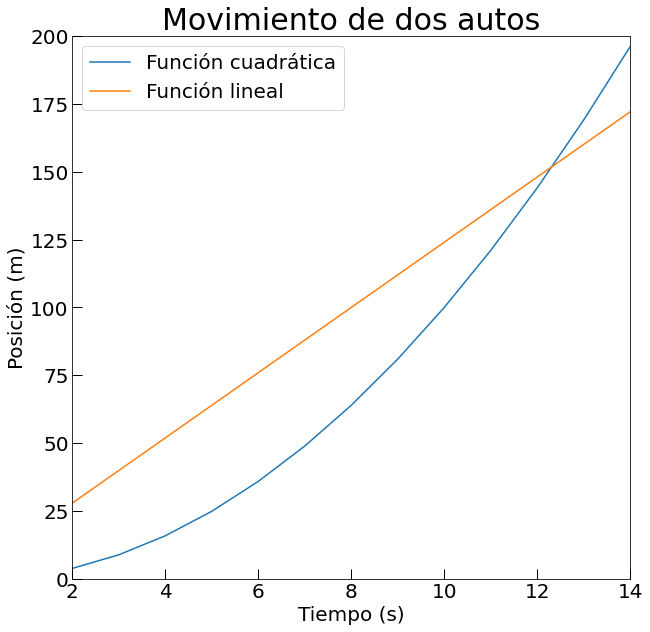

In [21]:
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.plot(eje_x,eje_y1,label='Función cuadrática')               # Primera etiqueta que se muestra en la leyenda
ax.plot(eje_x,eje_y2,label='Función lineal')                   # Segunda etiqueta que se muestra en la leyenda
ax.set_xlabel('Tiempo (s)',fontsize=20)                        # Nombre eje x
ax.set_ylabel('Posición (m)',fontsize=20)                      # Nombre eje y
ax.set_xlim(2,14)                                              # Rango del eje x
ax.set_ylim(0,200)                                             # Rango del eje y
ax.set_title('Movimiento de dos autos',fontsize=30)            # Título del gráfico
ax.tick_params(direction='in',length=10,width=1,labelsize=20)  # Parámetros de los ticks
ax.legend(fontsize=20, loc='best')                             # Leyenda
plt.show()

**Sitios de interés para esta sección**  👀:
1. [Plots de *matplotlib*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
2. [Sublots de *matplotlib*](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

## 5. Gráficos más utilizados <a name="5"></a>

### 5.1 Gráficos de línea <a name="5.1"></a>

Los gráficos de línea se suelen utilizar para mostrar la tendencia o cambio en una variable a lo largo del tiempo o de un eje. Es útil para representar series temporales o datos que tienen una relación continua.

En *matploltib* usamos $.plot()$ para graficar los sets de datos $x$ e $y$. A continuación creamos un gráfico para la función $cos(x)$. Utilizaremos [$np.linspace()$](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) para crear un set grande de datos para el eje $X$.

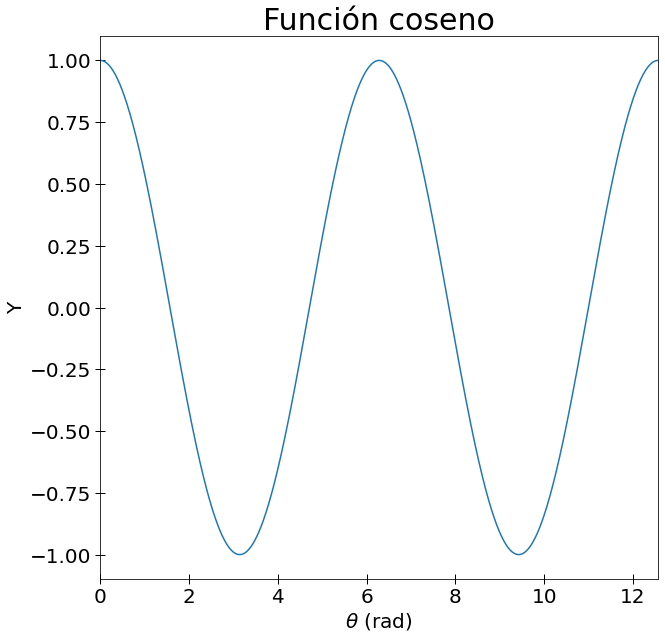

In [45]:
# Queremos graficar una función y que se vea continua -> ¡MAS DATOS!
eje_theta = np.linspace(0, 4*np.pi, 1000) # linspace crea 1000 datos entre los valores 0 y 4pi
eje_y = [np.cos(theta) for theta in eje_theta] # Usamos np.cos(x) para la función coseno

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(eje_theta,eje_y) # Gráfico de línea
ax.set_xlabel(r'$\theta$ (rad)',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_title('Función coseno',fontsize=30)
ax.set_xlim(0,4*np.pi)
ax.tick_params(direction='inout',length=10,width=1,labelsize=20)
plt.show()

### 5.2 Gráficos de dispersión <a name="5.2"></a>

Los gráficos de dispersión se suelen emplear para visualizar la relación entre dos variables numéricas discretas. Cada punto en el gráfico representa una observación y su posición respecto al eje $x$ e $y$. Usualmente los encontraremos cuando estudiamos datos directamente extraidos de la observación o experimentación.

En *matploltib* usamos $.scatter()$ para graficar los sets de datos $x$ e $y$. Para mostrar este tipo de gráficos trabajaremos con el archivo $datos\_experimentales.csv$.

#### Ejemplo <a name="Ejemplo_gráfico_de_dispersión"></a>

**¡Uno de los termómetros está dañado! 🥵**

Uno de los termómetros de Rafael fue hackeado por el DCC 😱 (Departamento de Ciencia de la Computación de la UC), y pareciera mostrar la temperatura en una escala desconocida para nuestro amigo. Rafael se dedicó toda la tarde a tomar temperaturas entre 0°C a 39°C, y por cada medición en el termómetro bueno miraba el termómetro dañado, el cual le mostraba una temperatura imprecisa en °F. 

A continuación leeremos los datos recabados para esta situación hipotética.

In [23]:
datos_t = Table.read('datos_experimentales.csv') # Leemos el archivo en la ruta "datos_experimentales.csv"
datos_t

Celsius,Fahrenheit
int32,float64
0,33.41209262153977
1,41.31437827945007
2,41.099592126414876
3,34.31978047447999
4,41.957447045347074
5,40.60946482927626
6,36.91777261921172
7,51.2353999730443
8,39.138429460873766


Graficaremos los datos de la tabla en un gráfico de dispersión.

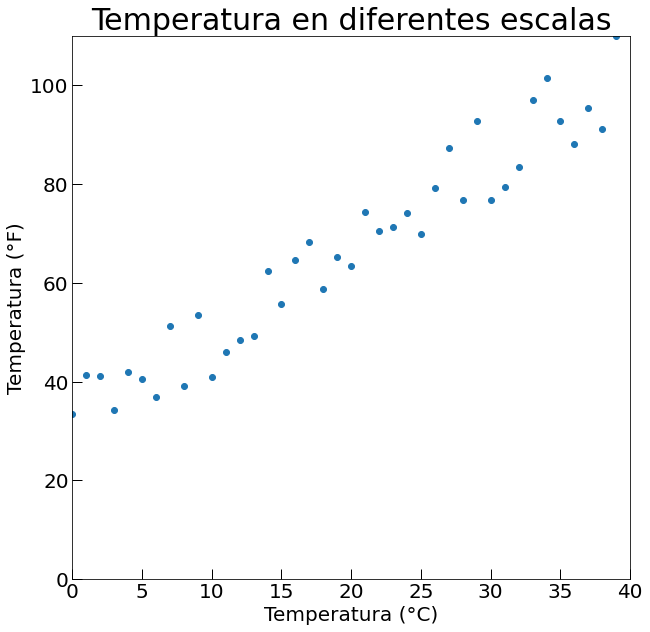

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(datos_t['Celsius'],datos_t['Fahrenheit']) # Gráfico de dispersión
ax.set_xlabel('Temperatura (°C)',fontsize=20)
ax.set_ylabel('Temperatura (°F)',fontsize=20)
ax.set_title('Temperatura en diferentes escalas',fontsize=30)
ax.set_ylim(0,110)
ax.set_xlim(0,40)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
plt.show()

### 5.3 Histogramas <a name="5.3"></a>

Los histogramas sirven para representar la distribución de frecuencias de una variable numérica cuando los datos son continuos. Consiste en barras que muestran la frecuencia o densidad de ocurrencia de los valores dentro de intervalos predefinidos. ¡Se los toparan bastante en la carrera!

La forma en que se agrupan estos datos es en **bines**, son rangos de valores (equitativos) para los cuales se registra el número de valores o frecuencia dentro de ese rango. Una de las formas de determinar una cantidad de $bins$ apropiada es tomando la raíz cuadrada del número total de elementos $\sqrt{N}$.

En *matploltib* usamos $.hist()$ para crear el histograma que tomará los $datos$ que le entreguemos. Además debemos señalar el número de bines $bins = $, el cual debe ser un número entero. Para mostrar este tipo de gráficos imaginemos una distribución normal de alturas en dos poblaciones.

#### Ejemplo

**Mico el micrófono pregunta la altura a la gente** 🗣🎙

[Mico el micrófono](https://youtube.com/playlist?list=PLwOanHdrCs2GmWXvelLT9lINibekKowGa&si=e1dL2Q6b1XsM_OXx) sale a la calle a preguntarle a la gente su altura, sin querer confunde los datos y obtiene dos poblaciones distintas, lo que Mico no se esperaba es que cada población presentara un comportamiento característico 👁👄👁.

En este caso hipotético generaremos dos sets de datos con la función $normal()$ del módulo *random* de *numpy*. Esta función genera $N$ cantidad de datos aleatorios siguiendo una [*distribución normal* o *gaussiana*](https://es.wikipedia.org/wiki/Distribución_normal), centrada en un valor promedio y con una desviación estándar dada. En nuestro caso $N = 200$ por lo que nuestro número de bines será $\sqrt{N} = \sqrt{200} \approx 14$.

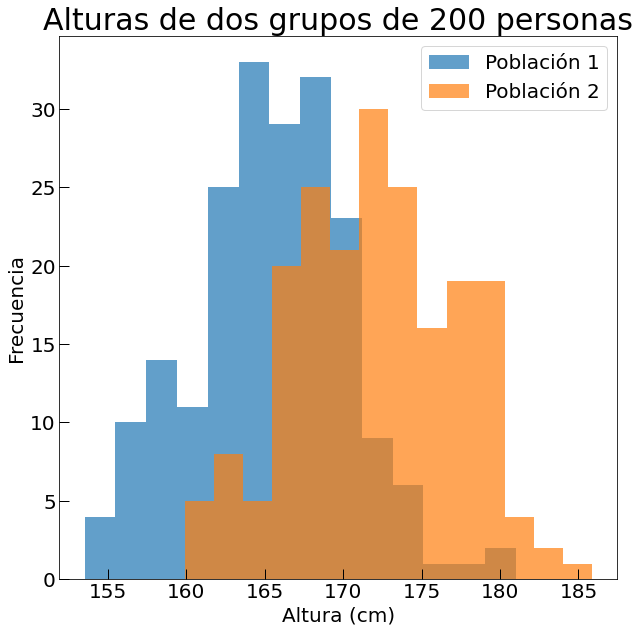

In [25]:
# Crear 200 datos aleatorios pertenecientes a una gaussiana centrada en 165 con desviación estándar 5
altura_1 = np.random.normal(165,5,200)

# Crear 200 datos aleatorios pertenecientes a una gaussiana centrada en 172 con desviación estándar 5
altura_2 = np.random.normal(172,5,200)

fig,ax = plt.subplots(figsize=(10, 10))
ax.hist(altura_1,bins=14,label='Población 1',alpha=0.7) # Histograma con 14 bins, alpha indica la transparencia
ax.hist(altura_2,bins=14,label='Población 2',alpha=0.7) # Histograma con 14 bins
ax.set_xlabel('Altura (cm)',fontsize=20)
ax.set_ylabel('Frecuencia',fontsize=20)
ax.set_title('Alturas de dos grupos de 200 personas',fontsize=30)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
ax.legend(fontsize=20, loc='best')
plt.show()

Además se le puede agregar el parámetro $density=True$ para normalizar el histograma, pero es necesario tener en mente que al hacerlo la frecuencia pasa a ser la frecuencia relativa.

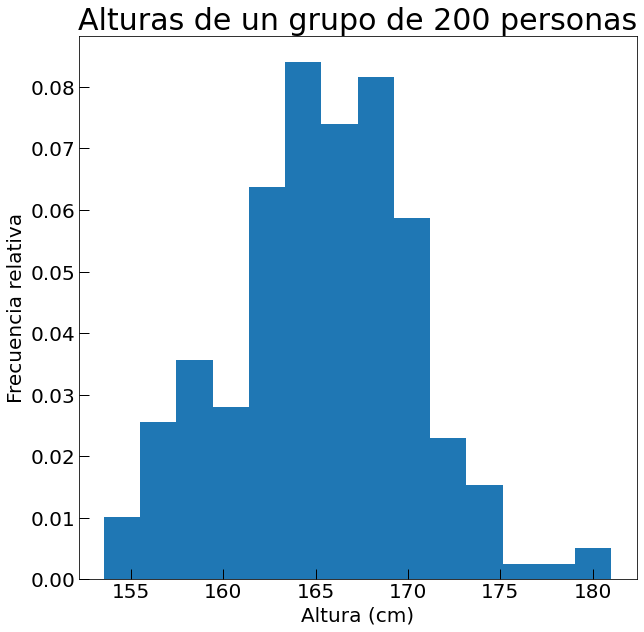

In [26]:
fig,ax = plt.subplots(figsize=(10, 10))
ax.hist(altura_1,bins=14,density=True) # Crea un histograma con 14 bins y normalizado
ax.set_xlabel('Altura (cm)',fontsize=20)
ax.set_ylabel('Frecuencia relativa',fontsize=20)
ax.set_title('Alturas de un grupo de 200 personas',fontsize=30)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)

### 5.4 Gráficos de contorno <a name="5.4"></a>

Los gráficos de controno se suelen utilizar para visualizar la densidad o la distribución de puntos en un plano. Los contornos muestran áreas de concentración alta o baja de datos, permitiendo identificar patrones espaciales. Los podemos encontrar en mapas topográficos, mapeos meteorológicos de la presión o temperatura del aire, o incluso el estudio de la densidad estelar de una galaxia, visualizando la distribución de las estrellas en la galaxia.

Muchas veces se les puede asociar una función $z(x,y)$ que depende de las variables $x$ e $y$. En *matploltib* usamos $.contourf()$ para graficar los sets de datos $x$,$y$ y $z$. Para mostrar este tipo de gráficos crearemos una "malla" 2D con los ejes $X$ e $Y$ y sobre esta asignaremos valores $Z$ de acuerdo a una función.

#### Ejemplo

**¡BREAKING NEWS! Meteorito cae en Linux 😢💥**

📻: *"La tarde del pasado jueves un meteorito impactó la zona de reunión de la facultad, dejando un cráter de impacto con una forma particular"*. 

En esta situación hipotética modelaremos la función [$z(x,y) = x^2 + y^2$](https://es.wikipedia.org/wiki/Paraboloide) que describe la altura de un cráter, para ellos definimos la función $altura()$ que retorna la altura $z$ del crater dada la distancia en $x$ e $y$. Utilizaremos $np.linspace()$ para crear los datos de distancia. Con la función [$np.meshgrid()$](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) creamos una matriz o cuadrícula en 2 dimensiones utilizando $x$ e $y$.

Además, podemos agregar una barra de color con $plt.colorbar()$, que indica qué significa cada color en el gráfico.

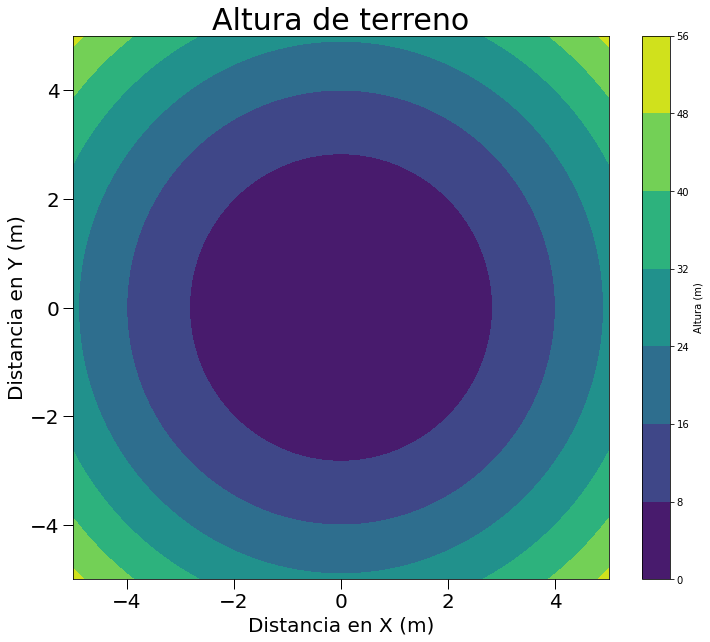

In [27]:
# Definir la función altura z(x, y)
def altura(x, y):
    return x**2 + y**2

# Crear un array de valores para x y y
distancia_x = np.linspace(-5, 5, 100)
distancia_y = np.linspace(-5, 5, 100)

# Crear una cuadrícula 2D a partir de los arrays x e y
X, Y = np.meshgrid(distancia_x, distancia_y)

# Calcular los valores de z para cada punto en la cuadrícula
Z = altura(X, Y)

fig, ax = plt.subplots(figsize=(12,10))
plt.contourf(X,Y,Z) # Gráfico de contorno relleno
plt.colorbar(label='Altura (m)') # Barra que indica que significa cada color
ax.set_xlabel('Distancia en X (m)',fontsize=20)
ax.set_ylabel('Distancia en Y (m)',fontsize=20)
ax.set_title('Altura de terreno',fontsize=30)
ax.tick_params(direction='out',length=10,width=1,labelsize=20)
plt.show()

### 5.5 Gráficos de barra <a name="5.5"></a>

Los gráficos de barra son útiles para comparar la frecuencia de diferentes categorías o grupos. Cada barra representa una categoría y su altura indica el valor asociado a esa categoría, lo que facilita la comparación visual entre ellas.

En *matploltib* usamos $.bar()$ para graficar las frecuencia $y$ asociadas a las categorías $x$.

#### Ejemplo

**Torneo de videojuegos ASTROFIZ 🕹**

El CEFF (Centro de Estudiantes Facultad de Física UC) quiere organizar un torneo de videojuegos pero no sabe qué es lo que juegan los jovenes de hoy en día 🗿. Para ello realizan una encuesta ordenando los datos en un gráfico de barras.

En esta situación hipotética tenemos un *array* con diferentes juegos, los cuales corresponden a las categorías que iran en el eje $X$ del gráfico, luego tenemos un *array* con frecuencias correspondientes a la cantidad de personas que juegan cada videojuego en el eje $Y$.

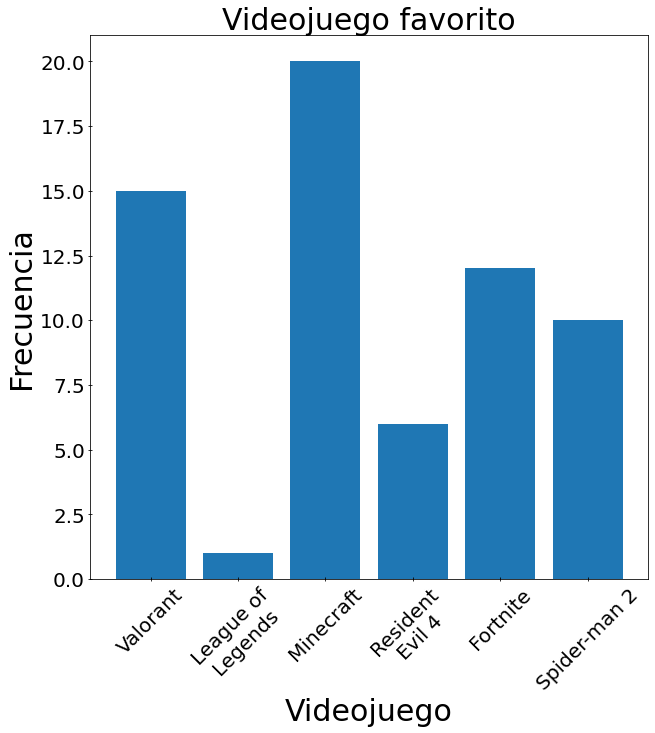

In [28]:
frecuencias = np.array([15,1,20,6,12,10])
juego_fav = np.array(['Valorant','League of\nLegends','Minecraft','Resident\nEvil 4','Fortnite','Spider-man 2'])

fig,ax=plt.subplots(figsize=(10,10))
ax.bar(juego_fav,frecuencias) # Gráfico de barras
ax.set_xlabel('Videojuego',fontsize=30)
ax.set_ylabel('Frecuencia',fontsize=30)
ax.tick_params(direction='inout',axis='both',labelsize=20)
ax.tick_params(axis='x',rotation=45)
ax.set_title('Videojuego favorito',fontsize=30)
plt.show()

**Sitios de interés para esta sección**  👀:
1. [Tipos de gráficos disponibles en *matplotlib*](https://matplotlib.org/stable/plot_types/index.html)
2. [Sobre ancho de los bines de un histograma](https://indico.cern.ch/event/428334/contributions/1047042/attachments/919069/1299634/ChoosingTheRightBinWidth.pdf)

## 6. Herramientas para estudiar gráficos <a name="6"></a>
Ya habiendo aprendido a crear gráficos a partir de datos, veamos algunas herramientas que podrían resultar útiles.

 ### Ajustes

Muchas veces, cuando tenemos un conjutno de datos observacionales o experimentales queremos ver si existe alguna relación entre las variables. Si revisamos el [ejemplo de los termómetros de Rafael](#Ejemplo_gráfico_de_dispersión) vemos que el gráfico apreciera presentar una relación lineal entre la Temperatura en °F y la Temperatura en °C. Buscamos entonces el mejor ajsute de los datos a un modelo o función. 

Existen varias formas de hacer esto con Pyhton, nosotros utilizaremos la función $curve\_fit()$ del módulo *optimize* de *scipy*. Esta función permite calcular la curva que mejor se ajuste a los datos dado un modelo $f$, con los sets de datos $x$ e $y$. $curve\_fit()$ retorna dos *arrays*, los parámetros del ajuste obtenido y los valores de covarianza, solo nos importará el primero.

Veamos el ejemplo de los termómetros.

In [29]:
# Importamos la función curve_fit
from scipy.optimize import curve_fit

Para este caso buscaremos un ajuste lineal. Este se puede entender como:

$$
F = a \cdot C + b
$$

Donde $F$ y $C$ son nuestras variables, y $a$, $b$ lso parámetros que buscamos.

In [30]:
datos_t = Table.read('datos_experimentales.csv') # Leemos los datos

C = datos_t['Celsius'] # Set de datos en x
F = datos_t['Fahrenheit'] # Set de datos en y

# Definimos el modelo que queremos probar, en este caso un ajuste lineal
def ajuste_lineal(x,a,b): # Alternativa: Escribir directamente return a*x + b
    y =  a*x + b
    return y

parametros,_ = curve_fit(ajuste_lineal, C, F) # Alterniativa: parametros = curve_fit(...)[0]

A = parametros[0] # Primer parámetro
B = parametros[1] # Segundo parámetro
print(f'Parámetro a: {A}')
print(f'Parámetro b: {B}')

Parámetro a: 1.7365699549118137
Parámetro b: 32.33587289714336


Ahora con los parámetros encontrados podemos graficar el ajuste junto al gráfico de dispersión.

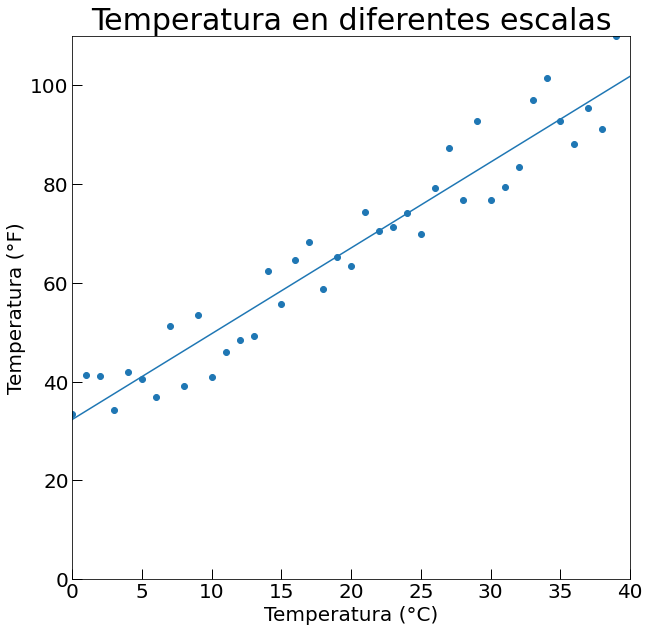

In [31]:
eje_x = np.linspace(0,40,1000) # Generamos 1000 datos en x para evaluar el ajuste
eje_y = [ajuste_lineal(x,A,B) for x in eje_x] # Evaluamos el ajuste con los parámetros A y B

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(C,F) # Gráfico de dispersión
ax.plot(eje_x,eje_y) # Gráfico de línea del ajuste
ax.set_xlabel('Temperatura (°C)',fontsize=20)
ax.set_ylabel('Temperatura (°F)',fontsize=20)
ax.set_title('Temperatura en diferentes escalas',fontsize=30)
ax.set_xlim(0,40)
ax.set_ylim(0,110)
ax.tick_params(direction='in',length=10,width=1,labelsize=20)
plt.show()

Nosotros sabemos que la relación entre la escala Fahrenheit y Celsius está dada por:

$$
F = \frac{9}{5} \cdot C + 32
$$

Vemos que $\frac{9}{5} = 1.8$ y que nuestro primer coeficiente es $A \approx 1.74$, cercano a 1.8. Luego Vemos que nuestro segundo coeficiente es $B \approx 32.33$, cercano a 32. 

## 6. Estética de un gráfico <a name="7"></a>

En esta sección veremos algunas cosas que, si bien no son necesarias para graficar, si pueden hacer que nuestros gráficos sean más coherentes, claros, y bonitos 😎.

* Colores

    Podemos cambiar el color de prácticamente todo. Por ejemplo, con $color$ (osimplemente $c$) podemos cambair el color de las líneas de nuestros gráficos, el relleno de los puntos en los gráficos de dispersión o el color de relleno de los histogramas.
    
* Estilos de línea y marcadores

    Con $linestyle$ o en algunos casos $ls$ podemos cambiar el estilo de las líneas, tenemos por ejemplo '-', '--' o ':'. También podemos cambiar la estéticas de los marcadores en los gráficos de línea y dispersión, tenemos una gran variedad como 'o', '^' o '*', que nos creará maracdores con forma de círculo, triángulo, y estrella respectivamente.
    
* Fuentes
    
    Podemos cambiar el estilo de las fuentes que usamos. Existen múltiples formas de hacerlo, aqui veremos dos que sirven según la parte del gráfico que queramos editar

La primera es con un diccionario, indicando la fuente ($family$), el color ($color$), el "peso" ($weight$), para poner el texto **negrita** por ejemplo, y el tamaño de la fuente ($size$).

In [38]:
font1 = {'family': 'Serif',
            'color':  'black',
            'weight': 'normal',
            'size': 20,
            }

La otra forma es usando $font\_manager$ de *matplotlib*, que en escencia nos permite hacer los mismo. Este caso nos servirá por ejemplo para cambiar las propiedades de texto de las leyendas

In [33]:
import matplotlib.font_manager as fm

font2 = fm.FontProperties(family='Serif',size=20,weight='normal')

También podemos editar los ticks como vimos anteriormente, e incluso añadir ticks intermedios más pequeños. Otra cosa que podemos agregar son barras de errores, con $.errorbar()$, a continuación se muestra una aplicación de todos estos aspectos.

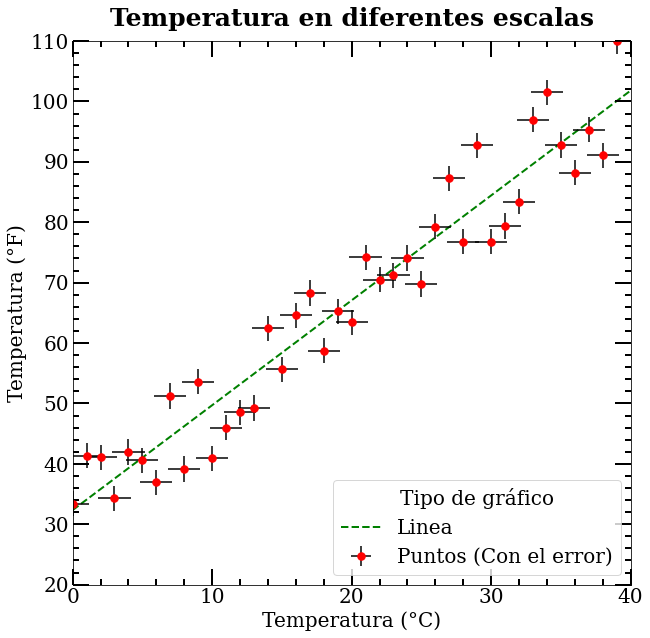

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(eje_x,eje_y,c='green',label='Linea',ls='--',lw=2,zorder=1)
err_C = np.std(C)/10
err_F = np.std(F)/10
ax.errorbar(C,F,xerr=err_C,yerr=err_F,fmt='.',ms='15',ecolor='k',color='r',label='Puntos (Con el error)',zorder=2)
ax.set_xlabel('Temperatura (°C)',fontdict=font1)
ax.set_ylabel('Temperatura (°F)',fontdict=font1)
ax.set_title('Temperatura en diferentes escalas',weight='bold',size=25,fontdict=font1,pad=15)



ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),fontdict=font1)
ax.set_yticks(ax.get_yticks(),ax.get_yticklabels(),fontdict=font1)
ax.minorticks_on()
ax.tick_params(direction='in',length=16,width=2,labelsize=20,which='major',right=True,top=True)
ax.tick_params(direction='in',length=6,width=2,labelsize=20,which='minor',right=True,top=True)
ax.set_xlim(0,40)
ax.set_ylim(20,110)
ax.legend(loc='lower right',prop=font2,title='Tipo de gráfico',title_fontproperties=font2)
plt.show()

Otros elementos que podemos agregar a nuestros gráficos:

* Cuadrícula

    Creará una cruadrícula con los ticks principales, lo hacemos utilizando $ax.grid()$.
    
* Líneas verticales y horizontales

    Podemos agregar líneas verticales con $ax.axvline()$ indicando el valor de $x$ en el que queremos la línea, o líneas horizontales con $ax.axhline()$ indicando el valor de $y$ en el que queremos la línea.
    
* Textos

    También podemos agregar textos flotantes en el gráfico utilizando $ax.text()$, a este le debemos indicar la posición $x$,$y$, el texto que queremos desplegar, y otros aspectos a nuestra elección.

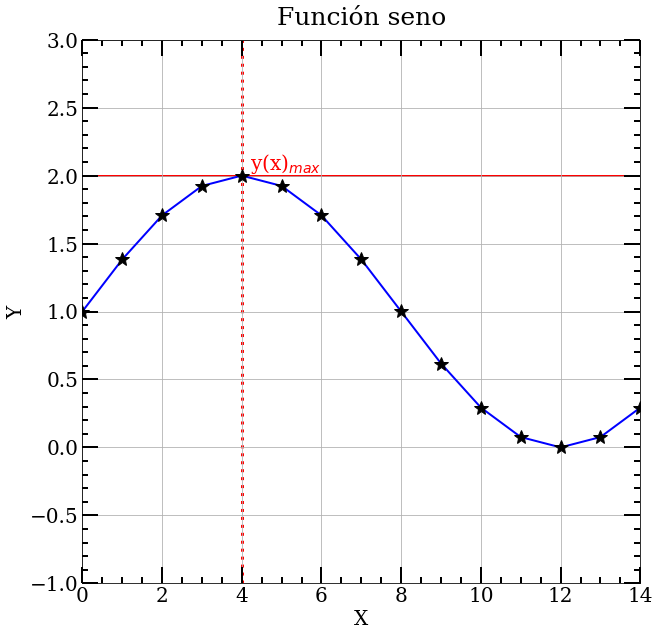

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(datos['x'],datos['y3'],c='b',lw=2,marker='*',ms=15,mfc='k',mec='k',zorder=2)
ax.set_xlabel('X',fontdict=font1)
ax.set_ylabel('Y',fontdict=font1)
ax.set_xlim(1,14)
ax.set_ylim(-1,3)
ax.set_title('Función seno',size=25,fontdict=font1,pad=15)
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),fontdict=font1)
ax.set_yticks(ax.get_yticks(),ax.get_yticklabels(),fontdict=font1)
ax.minorticks_on()
ax.tick_params(direction='in',length=16,width=2,labelsize=20,which='major',right=True,top=True)
ax.tick_params(direction='in',length=6,width=2,labelsize=20,which='minor',right=True,top=True)
ax.axvline(4,c='r',ls=':',lw=3,zorder=1)
ax.axhline(2,c='r',ls='-',lw=2,zorder=1)
ax.text(4.2,2,r'y(x)$_{max}$',color='r',ha='left',va='bottom',fontdict=font1)
ax.grid()
plt.show()

Como vimos antes, podemos cambiar el color de relleno de los hsitogramas, pero también podemos cambiar el tipo de histograma que se despliega, por ejemplo el tipi $step$ crea un histograma solo con el contorno.

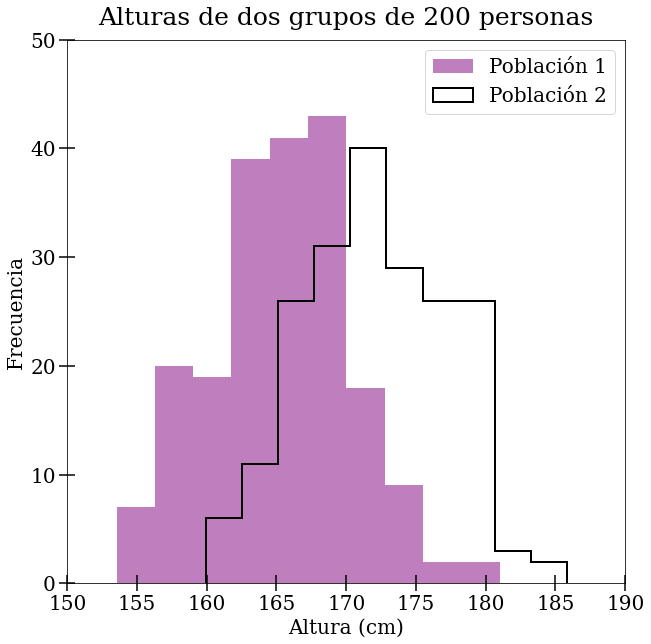

In [36]:
fig,ax = plt.subplots(figsize=(10, 10))
ax.hist(altura_1,bins=10,label='Población 1',color='purple',alpha=0.5) #Crea un histograma con 10 bins
ax.hist(altura_2,bins=10,label='Población 2',color='k',lw=2,histtype='step') #Crea un histograma con 10 bins
ax.set_xlabel('Altura (cm)',fontdict=font1)
ax.set_ylabel('Frecuencia',fontdict=font1)
ax.set_title('Alturas de dos grupos de 200 personas',size=25,fontdict=font1,pad=15)
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),fontdict=font1)
ax.set_yticks(ax.get_yticks(),ax.get_yticklabels(),fontdict=font1)
ax.tick_params(direction='inout',length=16,width=1.5,labelsize=20)
ax.legend(loc='best',prop=font2)
plt.show()

Para los gráficos de contorno podemos cambair el mapa de colores o $color map$ en el que se representan los valores de $Z$. Esto lo hacemos con $cmap$. También podemos editar la barra de colors.

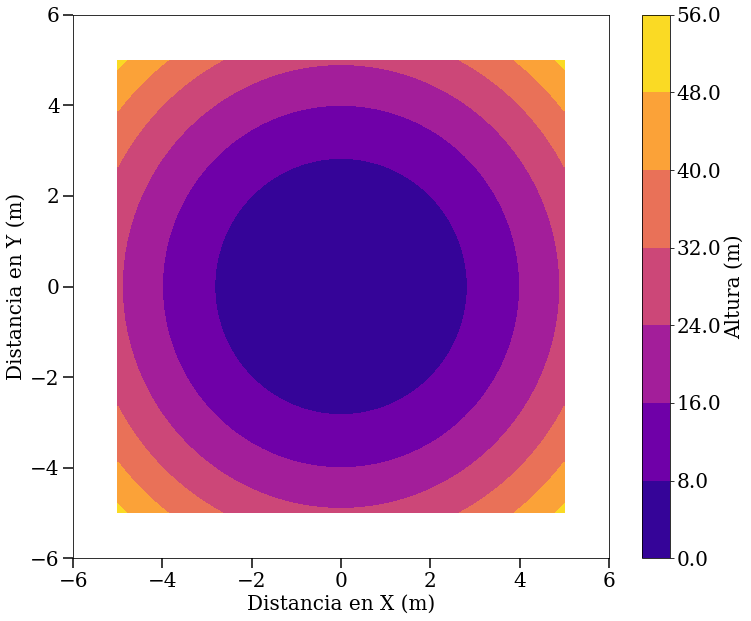

In [37]:
fig,ax = plt.subplots(figsize=(12,10))
plt.contourf(X,Y,Z,cmap='plasma') # Gráfico de contorno relleno
cbar = plt.colorbar()
cbar.set_label(label='Altura (m)',fontdict=font1)
cbar.set_ticks(cbar.get_ticks(),labels=cbar.get_ticks(),fontdict=font1)
ax.set_xlabel('Distancia en X (m)',fontdict=font1)
ax.set_ylabel('Distancia en Y (m)',fontdict=font1)
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(),fontdict=font1)
ax.set_yticks(ax.get_yticks(),ax.get_yticklabels(),fontdict=font1)
ax.tick_params(direction='out',length=10,width=1.5,labelsize=20)
plt.show()

Además se puede utilizar un código que ayuda a simplificar el proceso de crear los gráficos pues fija ciertos parámetros desde el inicio, por esto se debería escribir al comienzo del notebook. Un ejemplo de este tipo de código se puede ver a continuación:

In [38]:
from matplotlib import rcParams
plt.rcParams.update({"axes.titlesize" : 40,# Tamaño título
                                  "axes.labelsize" : 30,#  Tamaño  títulos de ejes.
                                  "lines.linewidth" : 3, # Grosor de líneas
                                  "lines.markersize" : 20, # Tamaño marker
                                  "xtick.labelsize" : 25, # Tamaño números eje x
                                  "ytick.labelsize" : 25})# Tamaño números eje x

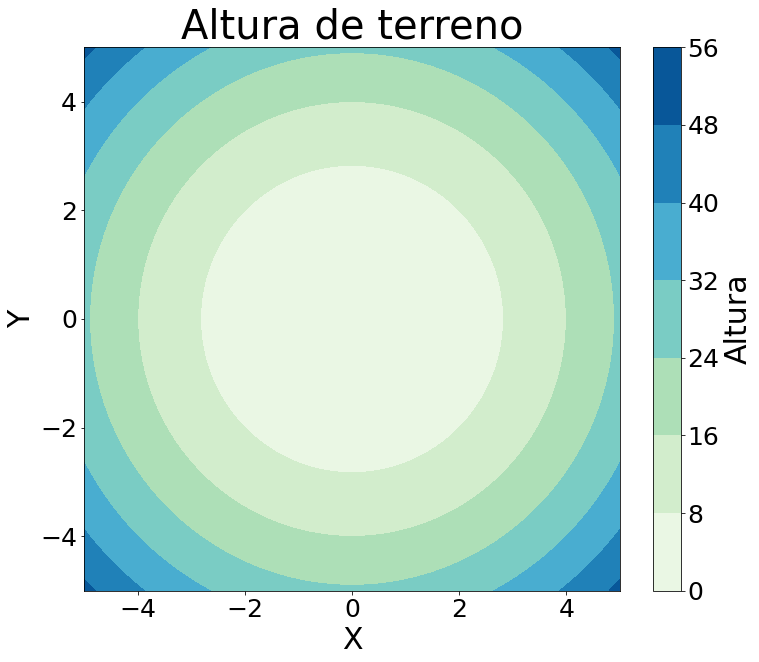

In [39]:
fig,ax=plt.subplots(figsize=(12,10))
plt.contourf(X,Y,Z,cmap='GnBu')
plt.colorbar(label='Altura')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Altura de terreno')
plt.show()

### Guardar imágenes (Taller 2023)
Para poder guardar gráficos como imágenes se debe utilizar el comando $plt.savefig()$ donde dentro del paréntesis se escribe el nombre del archivo. Esta imagen se guardará en la misma carpeta del archivo Python que se está utilizando. En el caso de usar Collab la imagen se encontrará en la sección de archivos donde puede ser descargada.

A continuación se muestra un ejemplo de como utilizar el comando.

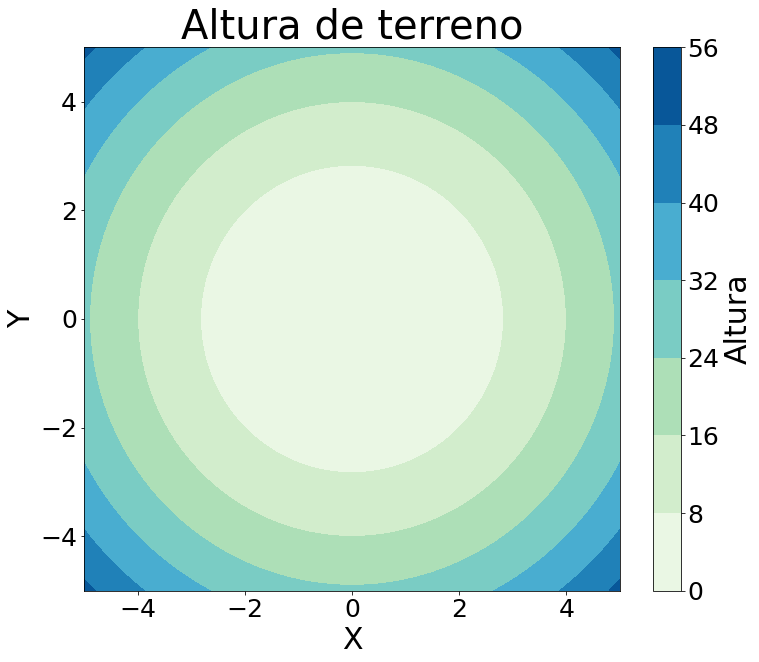

In [40]:
fig,ax=plt.subplots(figsize=(12,10))
plt.contourf(X,Y,Z,cmap='GnBu')
plt.colorbar(label='Altura')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Altura de terreno')
plt.savefig('Gráfico 1.png') # Guarda imágen con título: Gráfico 1 en formato png
plt.show()

**Sitios de interés para esta sección** 👀:
1. [Colores *matplotlib*](https://matplotlib.org/stable/gallery/color/named_colors.html)
2. [Colormaps *matplotlib*](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
3. [Opciones de edición de texto en *matplotlib*](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text)
4. [Opciones de edición de las líneas en *matplotlib*](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html)

## 8. Descripción de los gráficos (Taller 2023) <a name="8"></a>
Además de crear gráficos debemos saber interpretarlos y explicarlos. Al hacer un informe que contenga gráficos es importante mencionar tres cosas sobre estos:
*  **Explicación:** Que representa y si hay algún aspecto importante a destacar.
*  **Información**: Que información entrega el gráfico
*  **Análisis:** Que significa esta información.

Para ejemplificar esto ocuparemos datos de tiempo y posición.

Podemos ver que este gráfico cumple con todas las condiciones sin necesidad de especificarlas en las funciones.

En [este link](https://github.com/matplotlib/cheatsheets) puede encontrar unos *cheatsheets* 🤫muy buenos con más información de *matplotlib*.

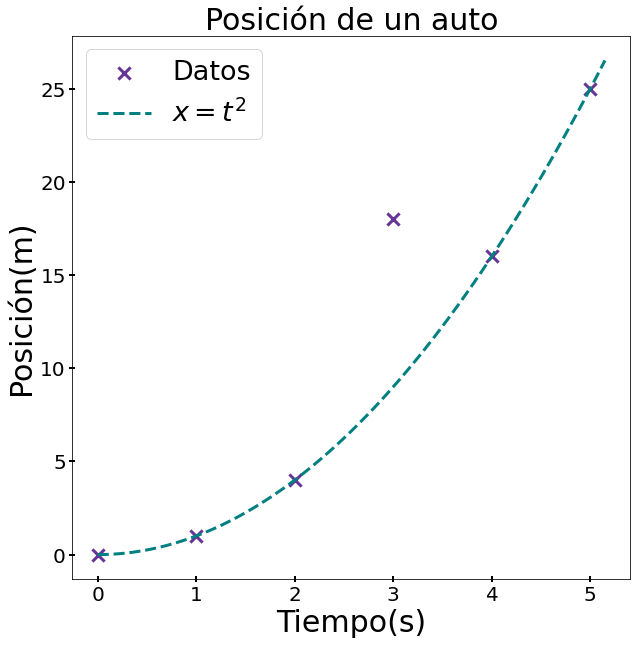

In [41]:
t=np.array([0,1,2,3,4,5])
x=np.array([0,1,4,18,16,25])
modelo=np.arange(0,5.2,0.05)
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(t,x,marker='x',s=150,color='Rebeccapurple',label='Datos')
ax.plot(modelo,modelo**2,'--',c='teal',label=r'$x=t^2$')
ax.set_xlabel('Tiempo(s)',fontsize=30)
ax.set_ylabel('Posición(m)',fontsize=30)
ax.tick_params(direction='inout',length=6,width=2,colors='k',labelsize=20)
ax.set_title('Posición de un auto',fontsize=30)
ax.legend(fontsize=27)
plt.show()

Este gráfico representa la posición de un auto con respecto al tiempo, se realizó un ajuste utilizando la ecuación de movimiento uniformemente acelerado:

$$
x= x_0 + u\cdot t + \frac{1}{2}a\cdot t^2
$$

Sabemos por los datos que la posición inicial y la velocidad inicial son 0, por lo que solamente utilizamos:

$$
x= \frac{1}{2}a\cdot t^2
$$

El mejor ajuste para los datos corresponde a la ecuación:

$$
x=t^2
$$

Esto nos permite identificar que la aceleración para este auto es a= 2$({m}/{s^2})$.
Se puede identificar que para t=3 el valor de la posición pareciera ser un *outlier* ya que no concuerda con el ajuste encontrado.

El gráfico permite observar que la posición del auto aumenta cuadráticamente con respecto al tiempo y siempre es positiva. Además al derivar la ecuación de la posición se obtiene que la velocidad aumenta linealmente con el tiempo y la aceleración es constante con un valor igual a 2$({m}/{s^2})$. Como el ajuste es casi perfecto se puede decir que los datos concuerdan con lo esperado por el marco teórico.